# 데이터수집(Crawling 등)
1. <span style="color:blue;font-size:20px;font-weight:bold;">빅데이터 정보를 활용하는 서비스</span>  
> 1. 자율주행차(0 ~ 5단계) : 인지 - 판단 - 제어
> 2. 커넥티스 카 : 정보통신기술 + 자동차(양방향 인터넷, 모바일 서비스가 가능한 차량)
> 3. 스마트 시티 : IoT와 AI, 빅데이터 분석, AR/VR/MR, 건강/교통/교육/기기제어 등의 요소 기술
> 4. 스마트 헬스 케어 : 종합 건강 정보 빅데이터 구축, 분야별 지식베이스 구축, 진단 및 처방용 AI    
2. <span style="color:blue;font-size:20px;font-weight:bold;">빅데이터</span>
> (위키피디아) 기존 데이터베이스 관리 도구의 수집, 저장, 관리, 분석 역량을 넘어서는 대량의 정형 또는 비정형 데이터셋 및 이러한 데이터로부터 가치 추출, 결과 분석 기술  
> (국가전략위원회) 대용량 데이터를 활용 및 분석하여 가치 있는 정보를 추출하고 생성된 지식을 바탕으로 능동적으로 대응하거나 변화를 예측하기 위한 정보화 기술  
> (삼성경제연구소) 기존의 관리 및 분석 체계로는 감당할 수 없을 정도의 거대한 데이터 집합으로 대규모 데이터와 관계된 기술 및 도구(수집, 저장, 검색, 공유, 분석, 시각화 등)을 모두 포함  
> (한국정보화진흥원) 저장, 관리, 분석할 수 있는 범위를 초과하는 규모의 데이터와 이것을 저장, 관리, 분석할 수 있는 하드웨어 및 소프트웨어 기술, 데이터 유통 및 활용하는 전 과정 거대 플랫폼  

3. <span style="color:blue;font-size:20px;font-weight:bold;">빅데이터 분류</span>
> 정형 데이터 : 관계형 데이터베이스처럼 스키마 형식에 맞게 저장(RDB, 스프레드시트 등)  
> 반정형 데이터 : 메타데이터나 스키마 등을 포함(XML, HTML, JSON, 웹문서, 웹로그 등)  
> 비정형 데이터 : 데이터 구조가 일정하지 않음, 예로, SNS, Text문서, 이미지/동영상/음성 데이터, PDF문서 등)  


## 웹크롤링 : naver 서비스 API 활용
1. 네이버 개발자 가입
   > [네이버 개발자 가입 developers.naver.com](https://developers.naver.com)  
   > [서비스API](https://developers.naver.com/products/service-api/datalab/datalab.md)  
   > [오픈API이용 신청]  
   > 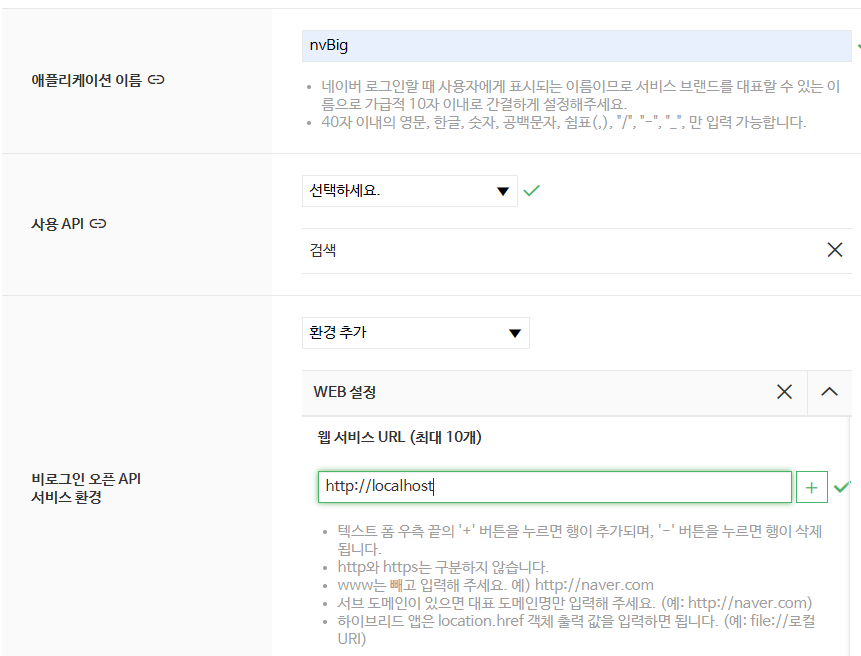   
   > <font color=green><b>[등록하기]</b></font>
   > &nbsp;&nbsp;==> 등록후 아래 오픈API정보 보관(비로그인 오픈 API 당일 사용량 최대 25,000번)    
   > 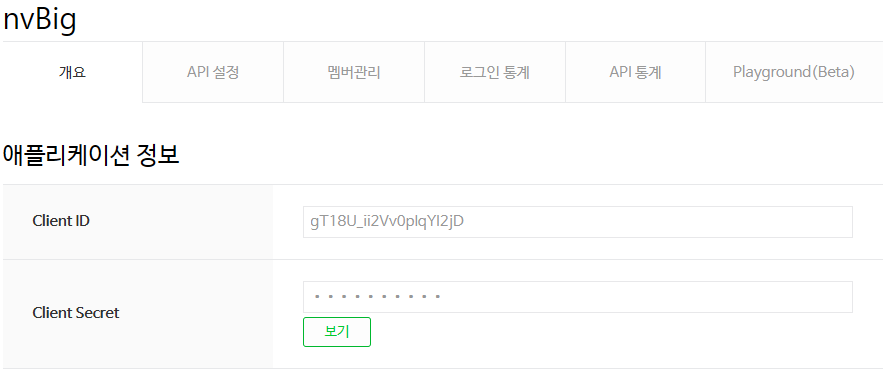
   > 

### Naver 오픈API를 활용한 검색
■ 네이버 검색 구분  
- 뉴스(<font color=blue>news</font>) : https://openapi.naver.com/v1/search/news.json  
- 블로그(<font color=blue>blog</font>) : https://openapi.naver.com/v1/search/blog.json  
- 카페(<font color=blue>cafearticle</font>) : https://openapi.naver.com/v1/search/cafearticle.json  
- 영화(<font color=blue>movie</font>) : https://openapi.naver.com/v1/search/movie.json  
- 쇼핑(<font color=blue>shop</font>) : https://openapi.naver.com/v1/search/shop.json   

In [ ]:
#import os
#import sys
import urllib.request
import datetime
#import time
import json
client_id = 'gT18U_ii2Vv0pIqYI2jD'    # Naver에서 본인의 ID, SECRET 생성하기
client_secret = 'vEKb093x4t'

def getRequestUrl(url):
    req = urllib.request.Request(url)
    req.add_header('X-Naver-Client-Id', client_id) # 서버에 보내는 요청 객체에 헤더 정보 추가
    req.add_header('X-Naver-Client-Secret',client_secret)
    try:
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print('[%s] Url(%s) Request Success' % (datetime.datetime.now(),url))
            return response.read().decode('utf-8')
    except Exception as e:
        print(e)
        print('[%s] Error for Url : %s' % (datetime.datetime.now(), url))
        return None
def getNaverSearch(node,srcText,start,display):
    base = 'https://openapi.naver.com/v1/search'
    node = '/%s.json' % node
    parameters = '?query=%s&start=%s&display=%s' % (urllib.parse.quote(srcText), start, display)
    url= base + node + parameters
    responseDecode=getRequestUrl(url)
    if (responseDecode == None):
        return None
    else:
        return json.loads(responseDecode)
def getPostData(post,jsonResult,cnt):
    title = post['title']
    description = post['description']
    org_link = post['originallink']
    link = post['link']
    pDate = datetime.datetime.strptime(post['pubDate'],'%a, %d %b %Y %H:%M:%S +0900')
    pDate = pDate.strftime('%Y-%m-%d %H:%M:%S')
    jsonResult.append({'cnt':cnt,'title':title,'description':description,'org_link':org_link,'link':link,'pDate':pDate})      
    return
def main():
    node = 'news' #크롤링할 대상   : news, blog, cafearticle, movie, shop
    srcText = input('검색어를 입력하시오')
    cnt = 0
    jsonResult = []
    jsonResponse  = getNaverSearch(node,srcText,1,100)  # start = 1(검색 시작 위치로 1(기본값) ~ 1000(최대값)), display = 100(출력건수)
    print(jsonResponse.keys())
    total  = jsonResponse['total']
    while((jsonResponse != None) and (jsonResponse['display'] != 0)):
        for post in jsonResponse['items']:
            cnt += 1
            getPostData(post,jsonResult,cnt)
        start = jsonResponse['start'] + jsonResponse['display']   # 
        jsonResponse  = getNaverSearch(node,srcText,start,100)

    print('전체 검색: %d 건' % total)
    with open('%s_naver_%s.json' % (srcText,node), 'w',encoding='utf8') as outfile:
        jsonFile = json.dumps(jsonResult, indent=4, sort_keys=True, ensure_ascii = False)
        outfile.write(jsonFile)

    print('가져온 데이터 : %d 건' % cnt)
    print('%s_naver_%s.json Saved' % (srcText,node))

if __name__ == '__main__':
    main()

## 웹크롤링 : 공공데이터 오픈API 활용
1. 공공데이터 활용 신청
   > [공공데이터포털 회원가입 www.data.go.kr](https://www.data.go.kr)  
   > 예시) 출입국관광통계서비스 검색
   > 오픈API  
   > 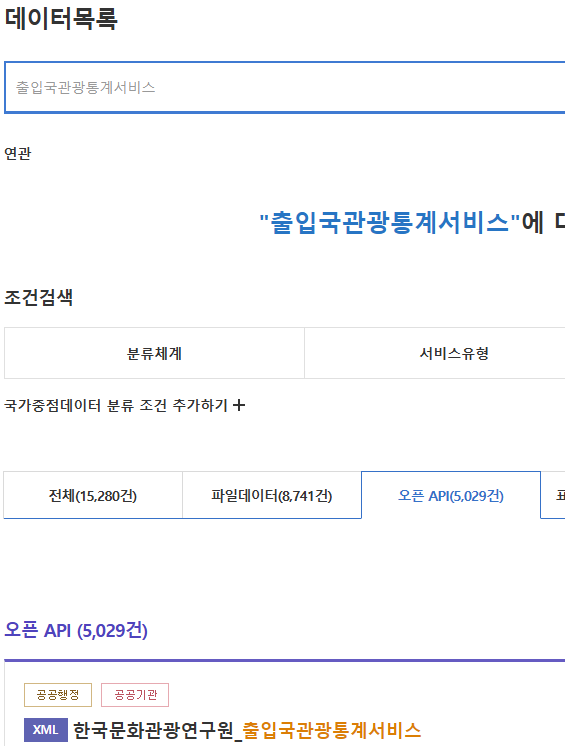   
   > <font color=green><b>[출입국관광통계서비스]</b></font>  
   > &nbsp;&nbsp;==>  
   > [신청후 아래 오픈API 활용: https://data.seoul.go.kr/together/guide/useGuide.do ](https://data.seoul.go.kr/together/guide/useGuide.do)    
   > 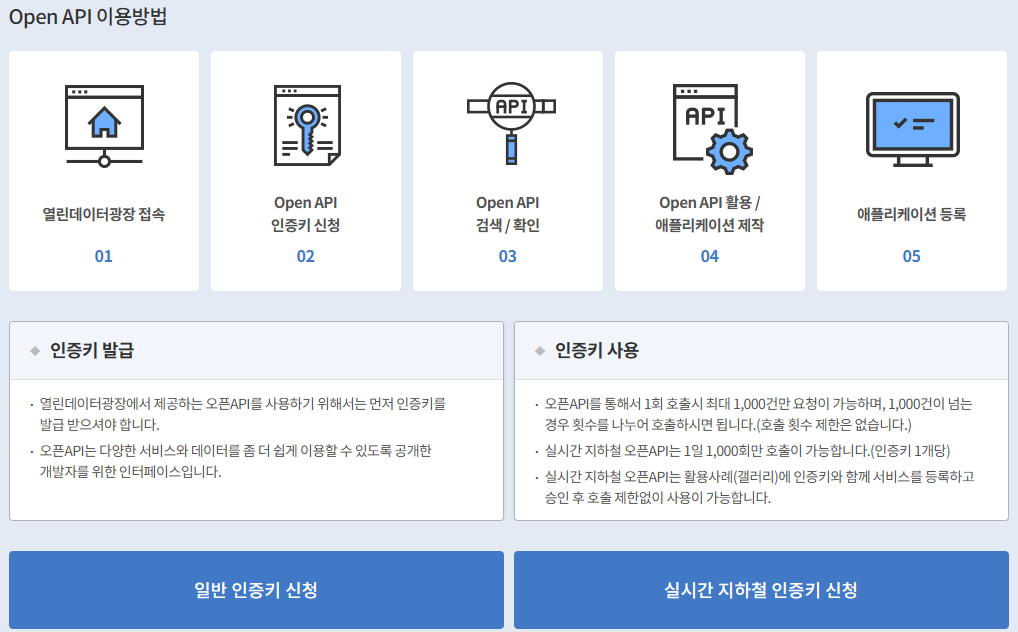  
   > 정보확인: 홈 > 마이페이지 > 데이터 활용 > Open API > 활용신청 현황      
   > 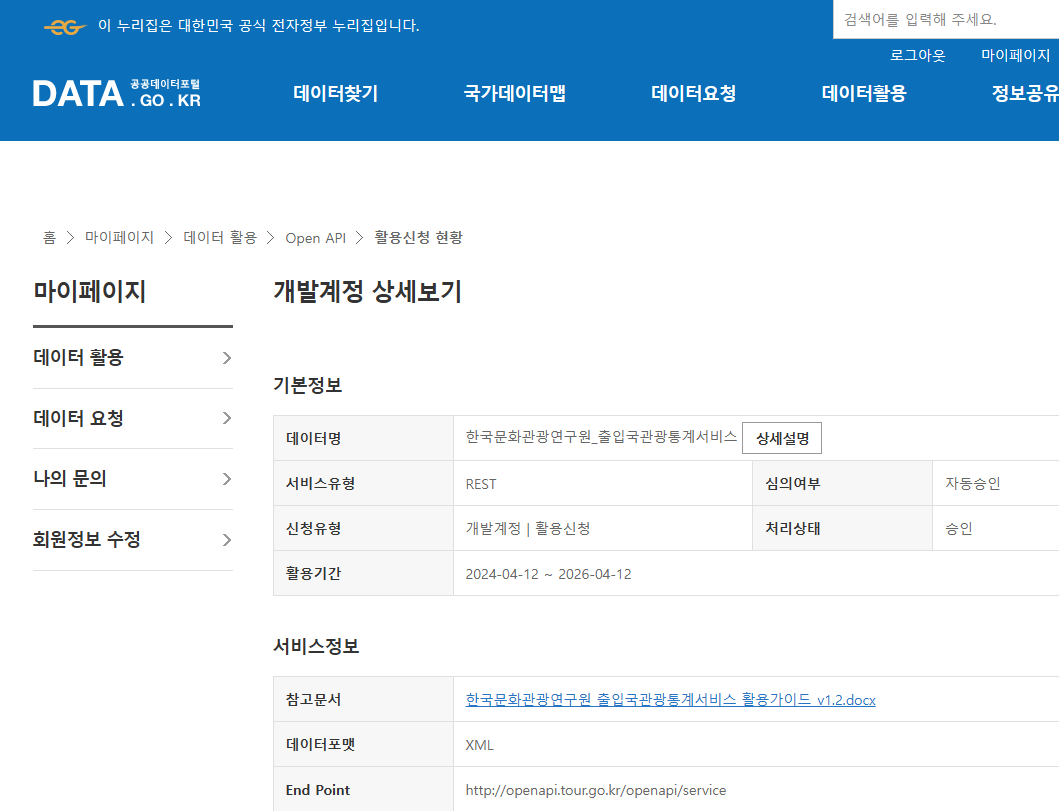  

In [ ]:
#import os
#import sys
import urllib.request
import datetime
#import time
import json
import pandas as pd
ServiceKey = 'Wu%2BBJzlq0gu6txWlzyTxGw01e%2FxRJrdmNksNsHB%2F%2BzMw7xrLzKqEscGv2Qt2DEDQLFyGOQ0Nom9gjrqh56DJww%3D%3D'

def getRequestUrl(url):
    req = urllib.request.Request(url)    
    try:
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print('[%s] Url(%s) Request Success' % (datetime.datetime.now(),url))
            return response.read().decode('utf-8')
    except Exception as e:
        print(e)
        print('[%s] Error for Url : %s' % (datetime.datetime.now(), url))
        return None
def getTourismStatsItem(yyyymm,nat_cd, ed_cd):
    base = 'http://openapi.tour.go.kr/openapi/service/EdrcntTourismStatsService/getEdrcntTourismStatsList'    
    parameters = '?_type=json&serviceKey='+ServiceKey #인증키
    parameters += '&YM='+yyyymm
    parameters += '&NAT_CD='+nat_cd
    parameters += '&ED_CD='+ed_cd
    
    url= base + parameters
    responseDecode=getRequestUrl(url)
    if (responseDecode == None):
        return None
    else:
        return json.loads(responseDecode)
def getTourismStatsService(nat_cd,ed_cd,nStartYear,nEndYear):
    jsonResult = []
    result = []
    dataEND = ''
    for year in range(nStartYear,nEndYear+1):
        for month in range(1,13):
            yyyymm = "{0}{1:0>2}".format(str(year), str(month))
            jsonData = getTourismStatsItem(yyyymm,nat_cd,ed_cd)
            if (jsonData['response']['header']['resultMsg'] == 'OK'):
                if jsonData['response']['body']['items'] == '':
                    dataEND = "{0}{1:0>2}".format(str(year), str(month-1))  # {1:0>글자수}.format(숫자) : 글자수보다 적은 부분을 0으로 채움, > 오른쪽정렬, < 왼쪽정렬 
                    print('데이터 없음...\n 제공되는 데이터는 %s년 %s월까지입니다.' % (str(year),str(month-1)))
                    break
                print(json.dumps(jsonData,indent=4, sort_keys = True, ensure_ascii = False))
                natName = jsonData['response']['body']['items']['item']['natKorNm']
                natName = natName.replace(' ','')
                num = jsonData['response']['body']['items']['item']['num']
                ed = jsonData['response']['body']['items']['item']['ed']
                print('[%s_%s: %s]' % (natName,yyyymm, num))
                print('-----------------------------------')
                jsonResult.append({'nat_name':natName,'nat_cd':nat_cd,'yyyymm':yyyymm, 'visit_cnt':num})
                result.append([natName,nat_cd,yyyymm,num])
    return (jsonResult,result,natName,ed,dataEND)
    
def main():
    jsonResult = []
    result = []
    print('입국 외국인 통계 데이터')
    nat_cd = input('국가코드(중국:112, 일본:130, 미국: 275): ')
    nStartYear = int(input('입국년도:'))
    nEndYear = int(input('출국년도:'))
    ed_cd = 'E' # E: 방한외래관광객, D: 해외 출국
    jsonResult, result, natName, ed, dataEND = getTourismStatsService(nat_cd, ed_cd, nStartYear, nEndYear)
    #json파일 저장
    with open('%s_%s_%d_%s.json' % (natName,ed,nStartYear,dataEND), 'w',encoding='utf8') as outfile:
        jsonFile = json.dumps(jsonResult, indent=4, sort_keys=True, ensure_ascii = False)
        outfile.write(jsonFile)

    #csv파일 저장
    columns = ["입국자국가", "국가코드", "입국년월", "입국자수"]
    result_df = pd.DataFrame(result,columns = columns)
    result_df.to_csv('%s_%s_%d_%s.csv' % (natName,ed,nStartYear,dataEND), index=False, encoding='utf8')

if __name__ == '__main__':
    main()

### 정적 웹 페이지 Crawling
> 설치  
> pip install beautifulsoup4  
> 모듈 추가  
> from bs4 import BeautifulSoup

In [ ]:
#간단한 사용 - 내용보기
from bs4 import BeautifulSoup as bs
html = '<h1 id="title">출판사</h1><div class="top"><ul class="menu"><li><a href="https://sso.jnu.ac.kr" class="login">로그인</a></li></ul><ul class="portal"><li><a href="https://portal.jnu.ac.kr">전남대 포털</a></li></ul></div>'
soup = bs(html, 'html.parser')
print(soup.prettify())

In [ ]:
soup.h1

In [ ]:
soup.div

In [ ]:
soup.find_all("ul")

In [ ]:
soup.find_all("a")

In [ ]:
tag_a = soup.a

In [ ]:
tag_a.attrs

In [ ]:
li_list = soup.select("div>ul.portal>li")
li_list

In [ ]:
title = soup.find(id="title")
title

### 정적 웹 페이지 정책
* 홈디렉토리: robots.txt
* 만일, robots.txt 파일이 없다면 제어 정책이 없다는 것으로 크롤링 가능
  > 모든 접근 허용: User-agent:*  Allow: /  또는 User-agent:* Disallow:  
  > 모든 접근 제한: User-agent:* Disallow: /  
  > 특정 디렉토리만 접근 금지: User-agent:* Disallow: /user/  

In [ ]:
# 간단한 예시
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import datetime

def hollys_store(result):
    for page in range(1,59):
        Hollys_url = 'https://www.hollys.co.kr/store/korea/korStore.do?pageNo=%d&sido=&gugnu=&store=' % page
        print(Hollys_url)
        html = urllib.request.urlopen(Hollys_url)
        soup = BeautifulSoup(html,'html.parser')
        tag_tbody = soup.find('tbody')
        for store in tag_tbody.find_all('tr'):
            if len(store) <= 3:
                break
            store_td = store.find_all('td')
            store_name = store_td[1].string
            store_sido = store_td[0].string
            store_address = store_td[3].string
            store_phone = store_td[5].string
            result.append([store_name]+[store_sido]+[store_address]+[store_phone])
    return

def main():
    result = [] 
    print('Hollys store crawling')
    hollys_store(result)
    hollys_tbl = pd.DataFrame(result,columns = ['store','sido-gu','address','phone'])
    hollys_tbl.to_csv('hollys1.csv',encoding='utf8',mode='w',index=True)
    del result[:]
if __name__ == '__main__':
    main()
            

### 동적 웹 페이지 크롤링
* 설치 및 사용법 
   > (필수)<font color=blue>pip install selenium</font>  
   > ChromeDriver 자동관리(webdriver_manager) : (필수)<font color=blue>pip install webdriver_manager</font>  
   > WebDriver 다운로드 : https://www.selenium.dev/downloads  
   > 사용법 소개: https://www.selenium.dev/documentation/  


In [ ]:
# selenium 예시(1)
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

#크롬 드라이버 생성
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
#구글 웹사이트 접속
driver.get("http://www.google.com")
# 검색 입력창 찾기(검색창의 이름 'q')
search_box = driver.find_element(By.NAME, 'q')
# 검색어 입력
search_box.send_keys('당뇨 환자 식단표')
# 검색 실행
search_box.submit()
time.sleep(5)
# 결과 페이지 스크린샷 저장
driver.save_screenshot('search_results.png')
#브라우저 종료
driver.quit()

## 셀레니움 명령어
* 크롬 드라이버 생성
 > from selenium import webdriver  
 > from selenium.webdriver.chrome.service import Service as ChromeService  
 > from webdriver_manager.chrome import ChromeDriverManager  
 > driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))   
* 사이트 접속
 > url = 'https://www.naver.com'  
 > driver.get(url)  

* XML기반의 XPath를 활용한 객체 찾은 후 값 가져오기  
 > driver.find_element('xpath','[실제 XPath 값]').text  
 > 
* 특정 위치 클릭
 > driver.find_element('xpath','[실제 XPath 값]').click()

* 특정 위치에 텍스트 입력
 > driver.find_element('xpath','[실제 XPath 값]').send_keys('[텍스트]')

* 그 외에 셀레니움 함수
 > 뒤로 : driver.back()  
 > 앞으로 : driver.forward()  
 > 새로고침: driver.refresh()  
 > 탭닫기: driver.close()  
 > 창닫기: driver.quit()  
 > 창최대화: driver.maximize_window()  
 > 창최소화: driver.minimize_window()  
 > 브라우저HTML정보출력: driver.page_source()  
  

In [ ]:
# selenium 예시(2)
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import datetime

def CoffeeBean_store(result):
    url = "http://www.coffeebeankorea.com/store/store.asp"
    #크롬 드라이버 생성
    driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
    for i in range(1,300): # 매장 수만큼 반복
        #커피빈 웹사이트 접속
        driver.get(url)
        time.sleep(1)
        try:
            # 커피빈 매장 정보 - 자바스크립트 함수 호출
            driver.execute_script("storePop2(%d)" % i)
            time.sleep(1)
            # 자바스크립트 함수가 수행된 페이지 저장
            html = driver.page_source
            # BeautifulSoup 객체 생성
            soup = BeautifulSoup(html,'html.parser')
            #print(soup.prettify())
            store_name_h2 = soup.select("div.store_txt > h2")
            store_name = store_name_h2[0].string
            print(store_name) #매장 이름 출력
            store_info = soup.select("div.store_txt > table.store_table > tbody > tr > td")
            store_address_list = list(store_info[2])
            store_address = store_address_list[0]
            store_phone = store_info[3].string
            result.append([store_name]+[store_address]+[store_phone])
        except:
            continue
    # 결과 페이지 스크린샷 저장
    driver.save_screenshot('CoffeeBean_results.png')
    #브라우저 종료
    driver.quit()
    return

def main():
    result = []
    print('CoffeeBean store crawling')
    CoffeeBean_store(result)
    CB_tb1 = pd.DataFrame(result, columns = ['store','address','phone'])
    CB_tb1.to_csv('CoffeeBean_info.csv', encoding='utf8', mode= 'w', index=True)

if __name__ == '__main__':
    main()            
